In [65]:
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

In [66]:
print("Reading")
#m2=399795-703091
col_names = ['ID','PARTNUMBER','SERIALNUMBER','PRODUCTIONRUN','MACHINENAME','CYCLENUMBER','CURRENTCYCLETIME','CYCLETIME','FILLTIME','SCREWRETPOSITION','TRANSITIONPOSITION','CUSHIONSIZE','REFILLTIME','NOZZLETEMP','BACKPRESS','INJSPEEDSEG1','INJSPEEDSEG2','INJSPEEDSEG3','PACKPRESSSEG1','HOLDPRESSSEG1','TRANSITIONPRESSURE','STOREDDATE','ACTIVE_MONITORINGID','PEAKPRESSURE','INJECTIONPRESSURE','ISBADPIECE','CYCLETIMEMIN','CYCLETIMEMAX','FILLTIMEMIN','FILLTIMEMAX','SCREWRETPOSITIONMIN','SCREWRETPOSITIONMAX','TRANSITIONPOSITIONMIN','TRANSITIONPOSITIONMAX','CUSHIONSIZEMIN','CUSHIONSIZEMAX','REFILLTIMEMIN','REFILLTIMEMAX','NOZZLETEMPMIN','NOZZLETEMPMAX','BACKPRESSMIN','BACKPRESSMAX','PEAKPRESSUREMIN','PEAKPRESSUREMAX','TRANSITIONPRESSUREMIN','TRANSITIONPRESSUREMAX','PACKPRESSSEG1MIN','PACKPRESSSEG1MAX','TOOLNUMBER']
data= pd.read_csv('sorted_data.csv',sep=',',nrows=403555,skiprows=1189957,names=col_names)
print("Reading done")
data.head()

Reading
Reading done


,ID,PARTNUMBER,SERIALNUMBER,PRODUCTIONRUN,MACHINENAME,CYCLENUMBER,CURRENTCYCLETIME,CYCLETIME,FILLTIME,SCREWRETPOSITION,TRANSITIONPOSITION,CUSHIONSIZE,REFILLTIME,NOZZLETEMP,BACKPRESS,INJSPEEDSEG1,INJSPEEDSEG2,INJSPEEDSEG3,PACKPRESSSEG1,HOLDPRESSSEG1,TRANSITIONPRESSURE,STOREDDATE,ACTIVE_MONITORINGID,PEAKPRESSURE,INJECTIONPRESSURE,ISBADPIECE,CYCLETIMEMIN,CYCLETIMEMAX,FILLTIMEMIN,FILLTIMEMAX,SCREWRETPOSITIONMIN,SCREWRETPOSITIONMAX,TRANSITIONPOSITIONMIN,TRANSITIONPOSITIONMAX,CUSHIONSIZEMIN,CUSHIONSIZEMAX,REFILLTIMEMIN,REFILLTIMEMAX,NOZZLETEMPMIN,NOZZLETEMPMAX,BACKPRESSMIN,BACKPRESSMAX,PEAKPRESSUREMIN,PEAKPRESSUREMAX,TRANSITIONPRESSUREMIN,TRANSITIONPRESSUREMAX,PACKPRESSSEG1MIN,PACKPRESSSEG1MAX,TOOLNUMBER
0,178682229,13673591.0,9894380484,860202,4,1888,NaN,19.4,1.03,1.12,0.3,0.30,5.98,481.8,55.0,1.79,1.42,0.76,579.0,578.0,985.0,4/27/2018 3:56:28 PM,167,1110.0,985.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13673591 PM A 0001
1,166845693,13593466.0,9894203735,836719,4,996,NaN,17.2,0.98,0.96,0.3,0.28,3.92,489.3,59.0,1.50,0.74,0.00,245.0,210.0,413.0,3/16/2018 8:04:49 PM,167,594.0,413.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13593466 PM A 0002
2,178733037,13673591.0,9894380487,860202,4,2633,NaN,19.6,1.02,1.12,0.3,0.30,6.11,483.2,55.0,1.82,1.42,0.76,577.0,577.0,967.0,4/27/2018 8:02:24 PM,167,1096.0,967.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13673591 PM A 0001
3,151001365,13673591.0,9893981618,814925,4,6640,NaN,20.7,1.00,1.11,0.3,0.28,5.47,482.5,56.0,1.81,1.42,0.76,547.0,547.0,880.0,1/23/2018 10:16:42 AM,167,1068.0,880.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13673591 PM A 0001
4,176639067,13673591.0,9894331286,857379,4,12325,NaN,20.0,1.00,1.11,0.3,0.27,4.54,482.2,64.0,1.81,1.42,0.76,579.0,579.0,894.0,4/20/2018 8:15:27 PM,167,1052.0,894.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13673591 PM A 0001


In [67]:
#col_names = ['ID','PARTNUMBER','SERIALNUMBER','PRODUCTIONRUN','MACHINENAME','CYCLENUMBER','CURRENTCYCLETIME','CYCLETIME','FILLTIME','SCREWRETPOSITION','TRANSITIONPOSITION','CUSHIONSIZE','REFILLTIME','NOZZLETEMP','BACKPRESS','INJSPEEDSEG1','INJSPEEDSEG2','INJSPEEDSEG3','PACKPRESSSEG1','HOLDPRESSSEG1','TRANSITIONPRESSURE','STOREDDATE','ACTIVE_MONITORINGID','PEAKPRESSURE','INJECTIONPRESSURE','ISBADPIECE','CYCLETIMEMIN','CYCLETIMEMAX','FILLTIMEMIN','FILLTIMEMAX','SCREWRETPOSITIONMIN','SCREWRETPOSITIONMAX','TRANSITIONPOSITIONMIN','TRANSITIONPOSITIONMAX','CUSHIONSIZEMIN','CUSHIONSIZEMAX','REFILLTIMEMIN','REFILLTIMEMAX','NOZZLETEMPMIN','NOZZLETEMPMAX','BACKPRESSMIN','BACKPRESSMAX','PEAKPRESSUREMIN','PEAKPRESSUREMAX','TRANSITIONPRESSUREMIN','TRANSITIONPRESSUREMAX','PACKPRESSSEG1MIN','PACKPRESSSEG1MAX','TOOLNUMBER']
datax= pd.read_csv('sorted_data.csv',sep=',',nrows=403555,skiprows=1189957,names=col_names)


cols5=['CYCLETIME','ISBADPIECE']
data5=datax[cols5]

#plt.figure()
#plt.xlabel("ISBADPIECE")
#plt.ylabel("ID")
#plt.show()

In [68]:
data5.head()

,CYCLETIME,ISBADPIECE
0,19.4,False
1,17.2,False
2,19.6,False
3,20.7,False
4,20.0,False


In [69]:
X = data5.drop('ISBADPIECE', axis=1)
y = data5['ISBADPIECE']

In [70]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [72]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [75]:
data5, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

In [76]:
trainX, testX, trainy, testy = train_test_split(data5, class_label, test_size=0.3, random_state=1)

In [77]:
model = RandomForestClassifier()
model.fit(trainX, trainy)

C:\Users\Gokhan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
probs = model.predict_proba(testX)

In [56]:
probs = probs[:, 1]

In [57]:
auc = roc_auc_score(testy, probs)
print('AUC: %.2f' % auc)

AUC: 0.94


In [58]:
fpr, tpr, thresholds = roc_curve(testy, probs)

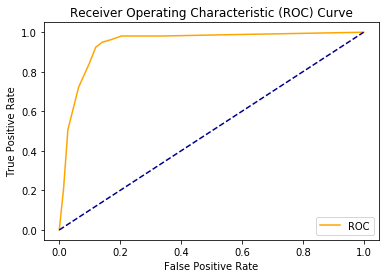

In [80]:
plot_roc_curve(fpr, tpr)